<center> <h1 style="background-color:orange; color:white"><br>Exploratory Data Analysis<br></h1></center>

# `Problem Statement:`
We have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car used to predict its price.

## `Importing the necessary libraries`





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## `Load the dataset into dataframe`

In [4]:
## load the csv file

df = pd.read_csv("/content/drive/MyDrive/Random_data/data.csv")

In [5]:
## print the head of the dataframe

df.head(4)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450


In [6]:
# Assuming 'df' is your DataFrame
columns = df.columns

print(columns)


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


Now we observe the each features present in the dataset.<br>

 `Make:` The Make feature is the company name of the Car.<br>
`Model:` The Model feature is the model or different version of Car models.<br>
`Year:`  The year describes the model has been launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` It's say the Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` It define the nos of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.







## `Check the datatypes`

In [7]:
# Get the datatypes of each columns number of records in each column.

# Get the data types of each column

d_types = df.dtypes

In [8]:
# Get the number of records in each column
num_records = df.count()

In [9]:
print("Data Types:\n", d_types)
print("\nNumber of Records:\n", num_records)

Data Types:
 Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Number of Records:
 Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64


## `Dropping irrevalent columns`

If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.


The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe.


`cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]`

These features are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset.

In [10]:
# initialise cols_to_drop

cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]

In [11]:
# drop the irrevalent cols and print the head of the dataframe
df =  df.drop(cols_to_drop, axis=1)


In [12]:
# print df head

df.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


## `Renaming the columns`

Now, Its time for renaming the feature to useful feature name. It will help to use them in model training purpose.<br>

We have already dropped the unneccesary columns, and now we are left with useful columns. One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

The given dict represents (in key value pair) the previous name, and the new name for the dataframe columns



In [13]:
# rename cols

rename_cols = {
    'Make': 'Manufacturer',
    'Model': 'CarModel',
    'Year': 'ProductionYear',
    'Engine HP': 'Horsepower',
    'Engine Cylinders': 'Cylinders',
    'Transmission Type': 'Transmission',
    'Driven_Wheels': 'DriveMode',
    'highway MPG': 'HighwayMPG',
    'city mpg': 'CityMPG',
    'MSRP': 'Price'
}

In [14]:
# use a pandas function to rename the current columns -
df = df.rename(columns=rename_cols)

In [15]:
# Print the head of the dataframe
df.head(7)

,Manufacturer,CarModel,ProductionYear,Horsepower,Cylinders,Transmission,DriveMode,HighwayMPG,CityMPG,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100


## `Dropping the duplicate rows`

There are many rows in the dataframe which are duplicate, and hence they are just repeating the information. Its better if we remove these rows as they don't add any value to the dataframe.

For given data, we would like to see how many rows were duplicates. For this, we will count the number of rows, remove the dublicated rows, and again count the number of rows.

In [16]:
# number of rows before removing duplicated rows
duplicates = df.duplicated()

In [17]:
# Count the number of duplicate rows
num_duplicates = duplicates.sum()

In [18]:
print(f"There are {num_duplicates} duplicate rows.")

There are 989 duplicate rows.


In [19]:
# drop the duplicated rows
df = df.drop_duplicates()

# print head of df

df.head(7)

,Manufacturer,CarModel,ProductionYear,Horsepower,Cylinders,Transmission,DriveMode,HighwayMPG,CityMPG,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100


In [20]:
# Count Number of rows after deleting duplicated rows
num_rows = df.shape[0]

In [21]:
print(f"There are {num_rows} rows after deleting duplicates.")

There are 10925 rows after deleting duplicates.


## `Dropping the null or missing values`

Missing values are usually represented in the form of Nan or null or None in the dataset.

Finding whether we have null values in the data is by using the isnull() function.

There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

In [22]:
# check for nan values in each columns
nan_values = df.isna().sum()

print(nan_values)


Manufacturer       0
CarModel           0
ProductionYear     0
Horsepower        69
Cylinders         30
Transmission       0
DriveMode          0
HighwayMPG         0
CityMPG            0
Price              0
dtype: int64


As we can see that the HP and Cylinders have null values of 69 and 30. As these null values will impact on models' accuracy. So to avoid the impact we will drop the these values. As these values are small camparing with dataset  that will not impact any major affect on model accuracy so we will drop the values.

In [23]:
# drop missing values
df = df.dropna()

In [24]:
# Make sure that missing values are removed
# check number of nan values in each col again
print(df.isnull().sum())

Manufacturer      0
CarModel          0
ProductionYear    0
Horsepower        0
Cylinders         0
Transmission      0
DriveMode         0
HighwayMPG        0
CityMPG           0
Price             0
dtype: int64


In [25]:
#Describe statistics of df


In [26]:
# Assuming df is your DataFrame
summary = df.describe()

print(summary)

       ProductionYear    Horsepower     Cylinders    HighwayMPG       CityMPG  \
count    10827.000000  10827.000000  10827.000000  10827.000000  10827.000000   
mean      2010.896370    254.553062      5.691604     26.308119     19.327607   
std          7.029534    109.841537      1.768551      7.504652      6.643567   
min       1990.000000     55.000000      0.000000     12.000000      7.000000   
25%       2007.000000    173.000000      4.000000     22.000000     16.000000   
50%       2015.000000    240.000000      6.000000     25.000000     18.000000   
75%       2016.000000    303.000000      6.000000     30.000000     22.000000   
max       2017.000000   1001.000000     16.000000    354.000000    137.000000   

              Price  
count  1.082700e+04  
mean   4.249325e+04  
std    6.229451e+04  
min    2.000000e+03  
25%    2.197250e+04  
50%    3.084500e+04  
75%    4.330000e+04  
max    2.065902e+06  


## `Removing outliers`

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

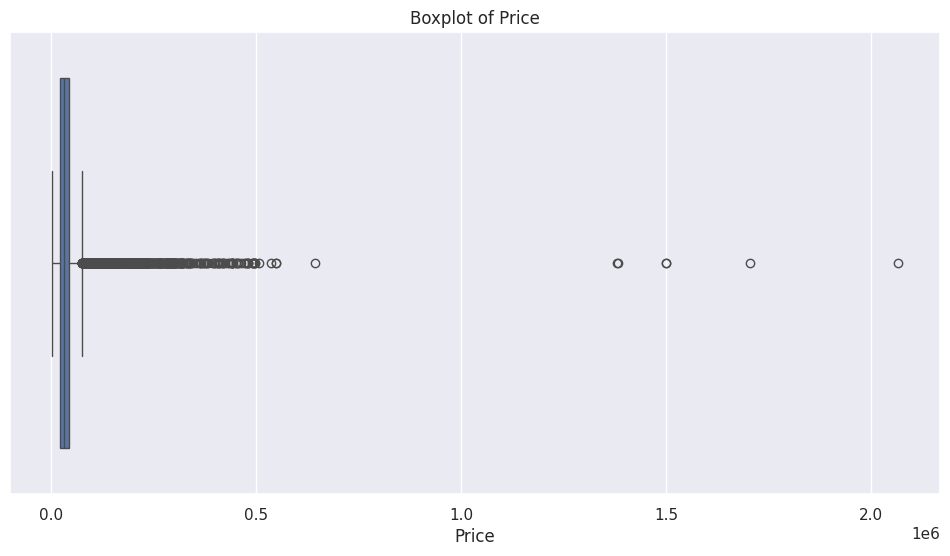

In [27]:
## Plot a boxplot for 'Price' column in dataset.
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

### **`Observation:`**<br>

Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.

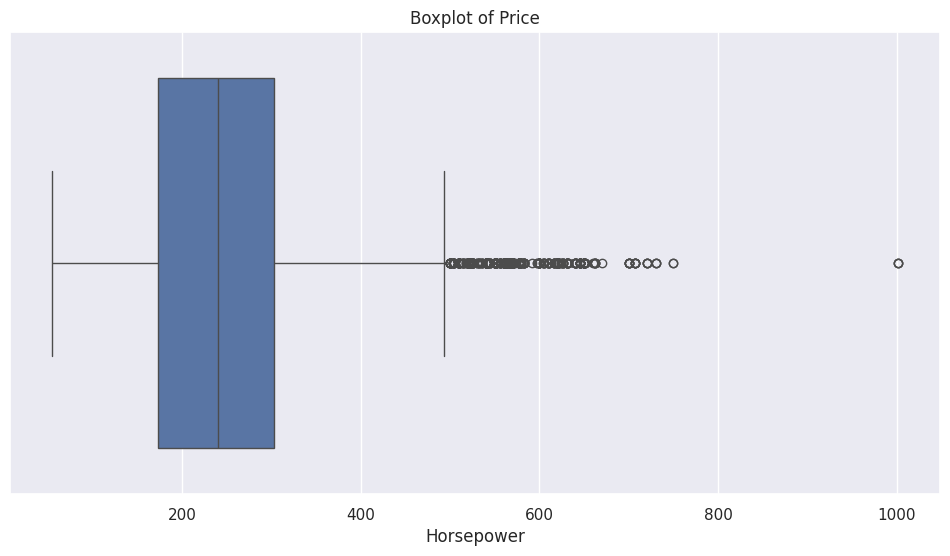

In [28]:
## PLot a boxplot for 'HP' columns in dataset
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Horsepower'])
plt.title('Boxplot of Price')
plt.show()

### **`Observation:`**<br>
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

print all the columns which are of int or float datatype in df.

Hint: Use loc with condition

In [29]:
# print all the columns which are of int or float datatype in df.
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [30]:
print(numeric_columns)

Index(['ProductionYear', 'Horsepower', 'Cylinders', 'HighwayMPG', 'CityMPG',
       'Price'],
      dtype='object')


### `Save the column names of the above output in variable list named 'l'`


In [31]:
# save column names of the above output in variable list
l = numeric_columns.tolist()

In [32]:
print(l)


['ProductionYear', 'Horsepower', 'Cylinders', 'HighwayMPG', 'CityMPG', 'Price']



['ProductionYear', 'Horsepower', 'Cylinders', 'HighwayMPG', 'CityMPG', 'Price']


['ProductionYear', 'Horsepower', 'Cylinders', 'HighwayMPG', 'CityMPG', 'Price']

## **`Outliers removal techniques - IQR Method`**


**Here comes cool Fact for you!**

IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

In [33]:
# Define the columns you want to check for outliers
cols_to_check = ['ProductionYear', 'Horsepower', 'Cylinders', 'HighwayMPG', 'CityMPG', 'Price']

# Initialize an empty DataFrame to store the non-outlier data
df2 = pd.DataFrame()

for col in cols_to_check:
    # Define Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Define IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the thresholds for outliers
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df_no_outliers = df[(df[col] >= lower_threshold) & (df[col] <= upper_threshold)]

    # Append the non-outlier data to df2
    df2 = pd.concat([df2, df_no_outliers], ignore_index=True)

# Remove duplicate rows in df2
df2 = df2.drop_duplicates()


In [34]:
# find the shape of df & df2
df.shape

(10827, 10)

In [35]:
df2.shape

(10827, 10)

In [36]:
for i in df.columns:
    print("--------------- %s ----------------" % i)
    print(df[i].value_counts())

--------------- Manufacturer ----------------
Manufacturer
Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren          

## `Visualising Univariate Distributions`

We will use seaborn library to visualize eye catchy univariate plots.

Do you know? you have just now already explored one univariate plot. guess which one? Yeah its box plot.


### `Histogram & Density Plots`

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

In [37]:
!pip install seaborn matplotlib

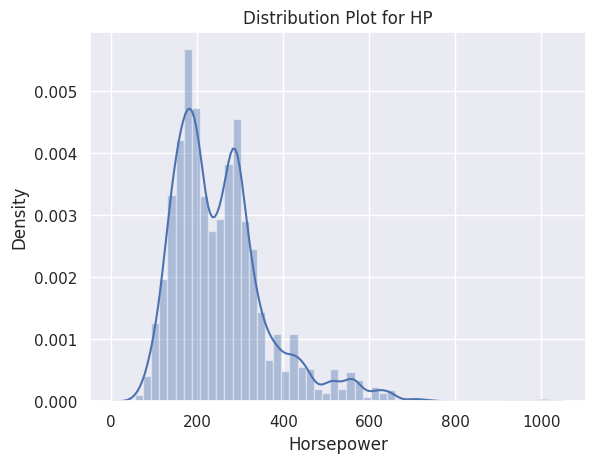

In [38]:
#ploting distplot for variable HP

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'HP' is the column for which you want the distribution plot
sns.distplot(df['Horsepower'])

plt.title('Distribution Plot for HP')
plt.show()


### **`Observation:`**
We plot the Histogram of feature HP with help of distplot in seaborn.<br>
In this graph we can see that there is max values near at 200. similary we have also the 2nd highest value near 400 and so on. <br>
It represents the overall distribution of continuous data variables.<br>

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.
- Hint: use matplotlib subplot function

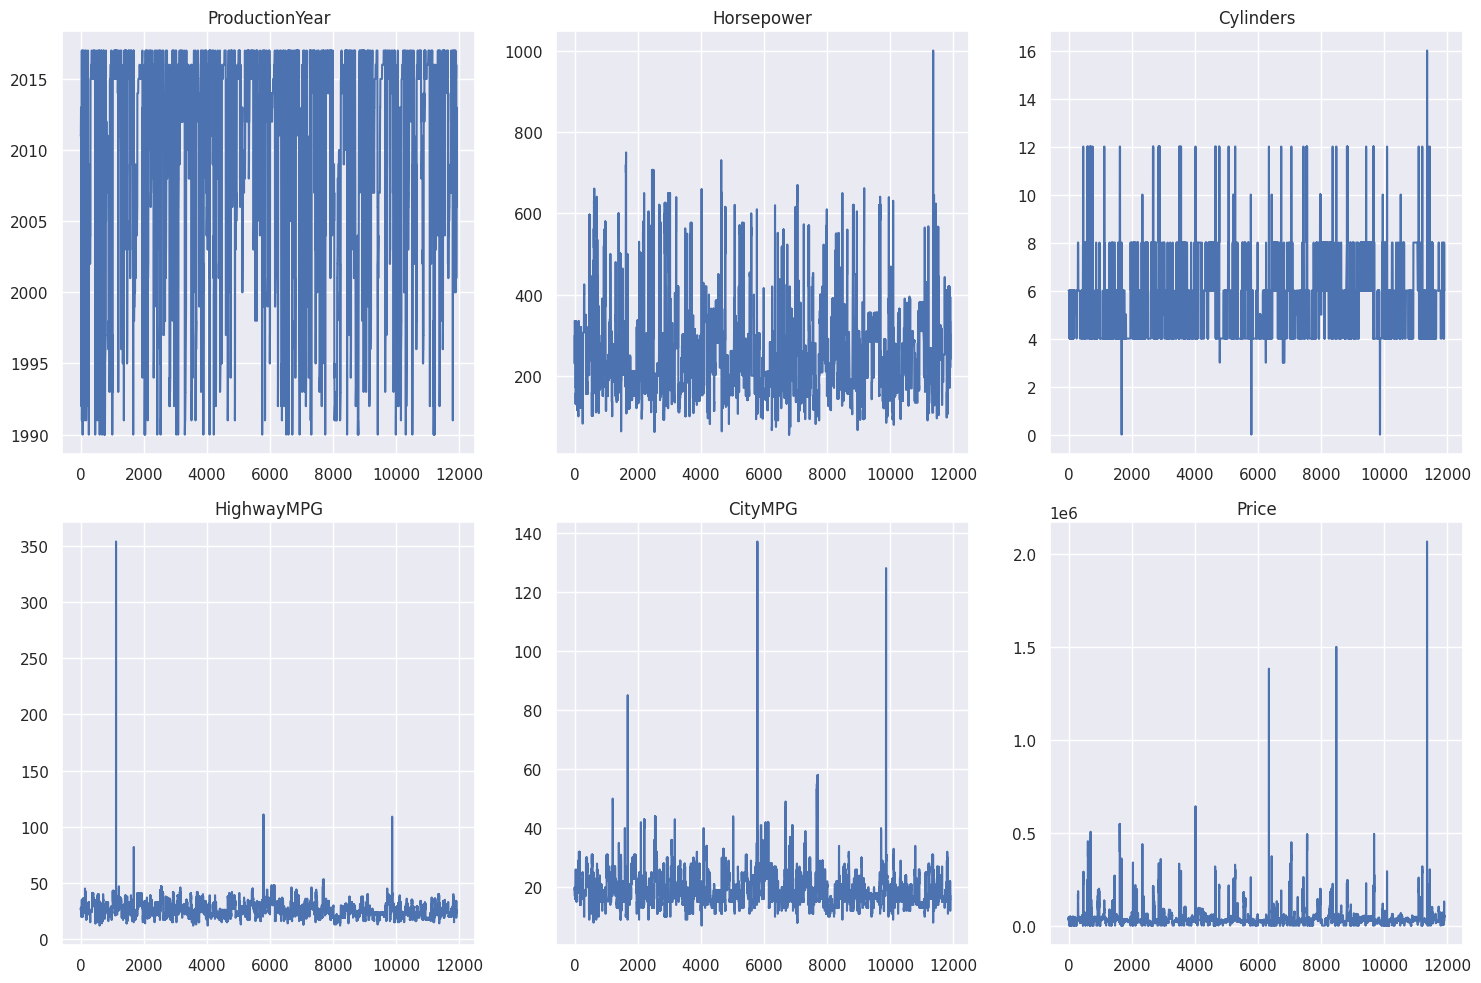

In [39]:
import matplotlib.pyplot as plt

l = ['ProductionYear', 'Horsepower', 'Cylinders', 'HighwayMPG', 'CityMPG', 'Price']

plt.figure(figsize=(15,10))
for i in range(len(l)):
    plt.subplot(2, 3, i+1)
    plt.plot(df[l[i]])
    plt.title(l[i])
plt.tight_layout()
plt.show()


## `Bar Chart Plots`


In [40]:
df.head()

,Manufacturer,CarModel,ProductionYear,Horsepower,Cylinders,Transmission,DriveMode,HighwayMPG,CityMPG,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Plot a histogram depicting the make in X axis and number of cars in y axis. <br>

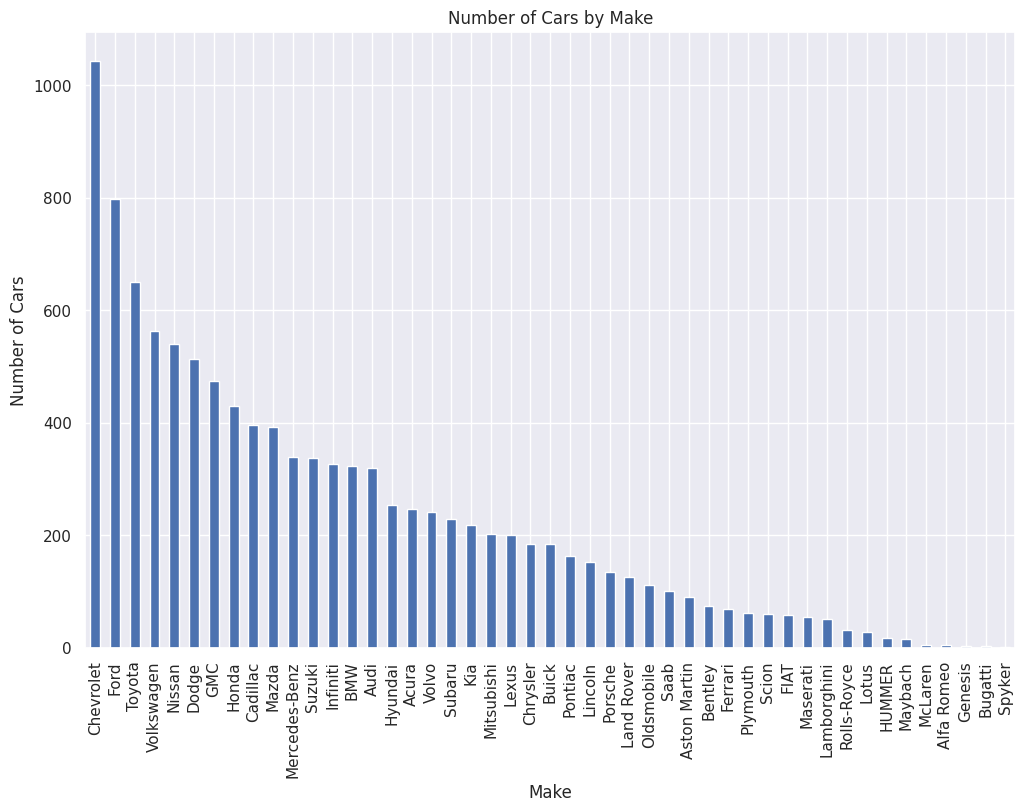

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame and 'make' is the column with car makes
make_counts = df['Manufacturer'].value_counts()

plt.figure(figsize=(12,8))
make_counts.plot(kind='bar')
plt.title('Number of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.show()


### **`Observation:`**
In this plot we can see that we have plot the bar plot with the cars model and nos. of cars.

### `Count Plot`
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


 Plot a countplot for a variable Transmission vertically with hue as Drive mode

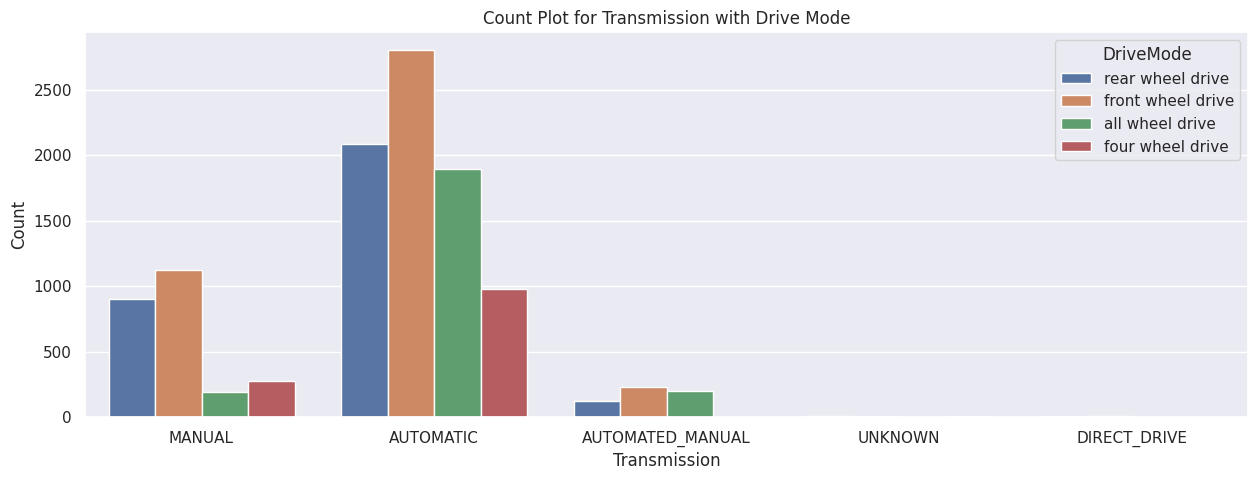

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.countplot(x='Transmission', hue='DriveMode', data=df, orient='v')
plt.title('Count Plot for Transmission with Drive Mode')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()


### **`Observation:`**
In this count plot, We have plot the feature of Transmission with help of hue.<br>
We can see that the the nos of count and the transmission type and automated manual is plotted. Drive mode as been given with help of hue.<br>


# `Visualising Bivariate Distributions`


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## `Scatter Plots`
Scatterplots are used to find the correlation between two continuos variables.

Using scatterplot find the correlation between 'HP' and 'Price' column of the data.



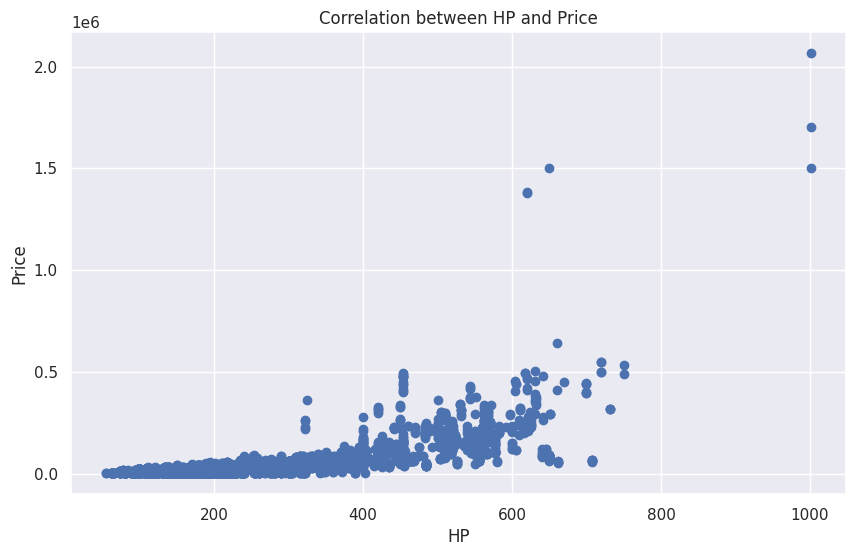

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Horsepower'], df['Price'])
ax.set_title('Correlation between HP and Price')
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

### **`Observation:`**<br>
It is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.<br>
We have plot the scatter plot with x axis as HP and y axis as Price.<br>
The data points between the features should be same either wise it give errors.<br>


## `Plotting Aggregated Values across Categories`


### `Bar Plots - Mean, Median and Count Plots`



Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure.

For example, say you want to visualise and *compare the Price across Cylinders*. The ```sns.barplot()``` function can be used to do that.


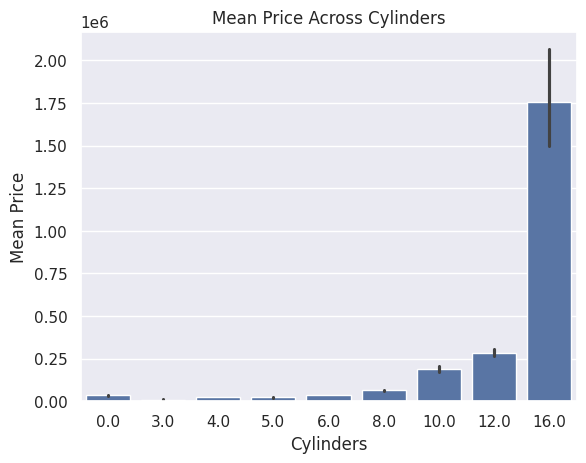

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'Cylinders' and 'Price'
sns.barplot(x='Cylinders', y='Price', data=df)

plt.title('Mean Price Across Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Mean Price')
plt.show()

### **`Observation:`**<br>
By default, seaborn plots the mean value across categories, though you can plot the count, median, sum etc.<br>
Also, barplot computes and shows the confidence interval of the mean as well.



## `When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis.`

### `Let's now drill down into Transmission sub categories.`

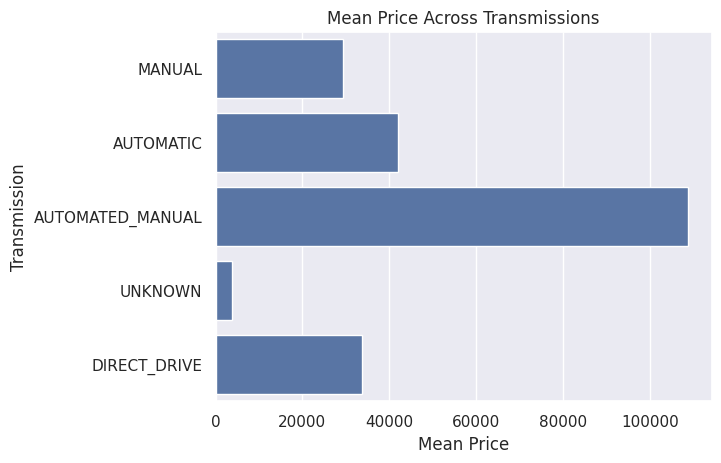

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'Transmission' and 'Price'
sns.barplot(x='Price', y='Transmission', data=df, ci=None)

plt.title('Mean Price Across Transmissions')
plt.xlabel('Mean Price')
plt.ylabel('Transmission')
plt.show()

These plots looks beutiful isn't it? In Data Analyst life such charts are there unavoidable friend.:)

# `Multivariate Plots`



## `Heatmaps`


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

Using heatmaps plot the correlation between the features present in the dataset.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    10827 non-null  object 
 1   CarModel        10827 non-null  object 
 2   ProductionYear  10827 non-null  int64  
 3   Horsepower      10827 non-null  float64
 4   Cylinders       10827 non-null  float64
 5   Transmission    10827 non-null  object 
 6   DriveMode       10827 non-null  object 
 7   HighwayMPG      10827 non-null  int64  
 8   CityMPG         10827 non-null  int64  
 9   Price           10827 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.4+ KB


In [56]:
#find the correlation of features of the data
# corr =
new = df.drop(columns=['Manufacturer','CarModel','Transmission','DriveMode'],axis = 1)     # DELETING CATAGEORICAL COLUMN FROM DATASET WITH INDEX
new.head()

,ProductionYear,Horsepower,Cylinders,HighwayMPG,CityMPG,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500


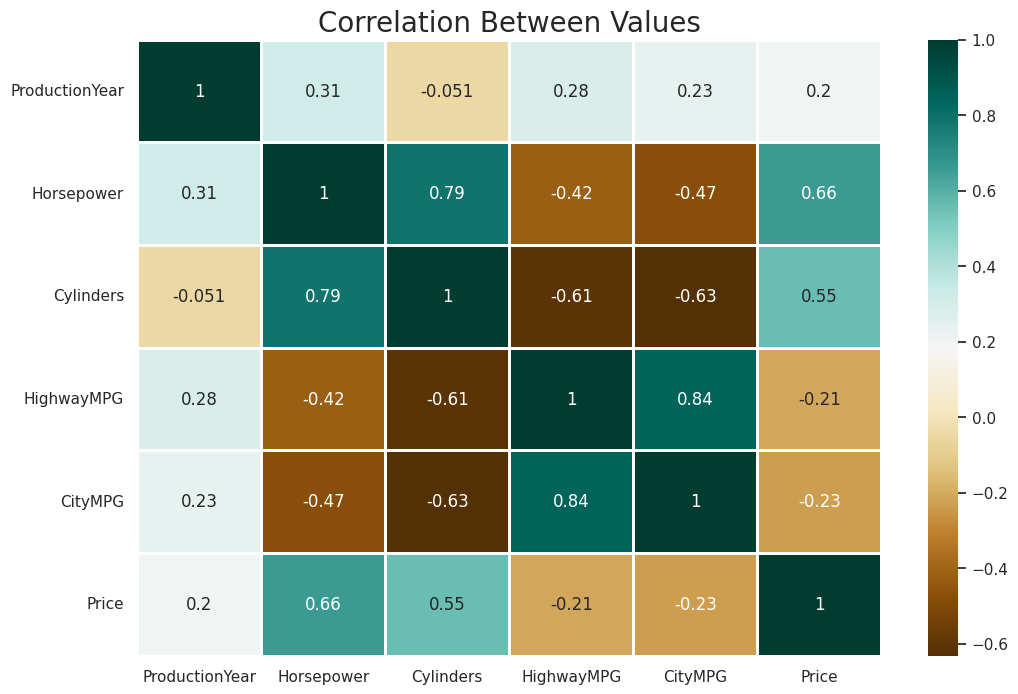

In [59]:
plt.figure(figsize = (12,8))                                                         # Set the size of the graph

sns.heatmap(new.corr(), cmap='BrBG', annot=True, linewidth=1)                        # Create heatmap with parameters

plt.title('Correlation Between Values', fontsize=20)
plt.show()


### **`Observation:`**<br>
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.


The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1.
